In [15]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

Collecting the headers by parsing from text file.

In [6]:
df = pd.read_csv("census_income_learn.csv", header=None)
def headers(file):
    with open(file, 'r') as f:
        h = []
        lines = f.readlines()
        for i in range(142, 184):
            temp = lines[i].partition(':')[0]
            if temp[0] == '|':
                i = i - 1
                continue
            h.append(temp)
        h.append('Class')
    return h
header = headers("census_income_metadata.txt")

In [7]:
continuous = ['age', 'wage per hour', 'capital gains', 'capital losses', 'dividends from stocks', 'instance weight',
              'num persons worked for employer', 'weeks worked in year']

In [8]:
def plot_(fig, l1, l2, t):
    plt.figure(fig)
    plt.xlabel(l1)
    plt.ylabel(l2)
    plt.title(t)

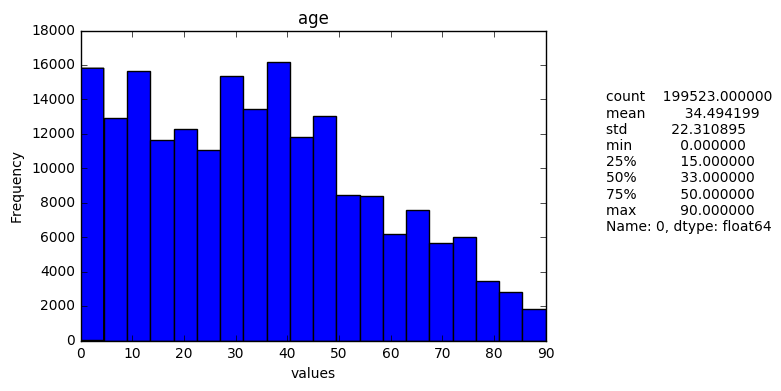

In [9]:
dist = df[0].sort_values()
plot_(0, 'values', header[0], header[0])
dist.plot.hist(bins=20)
plt.figtext(1, 0.4, df[0].describe())

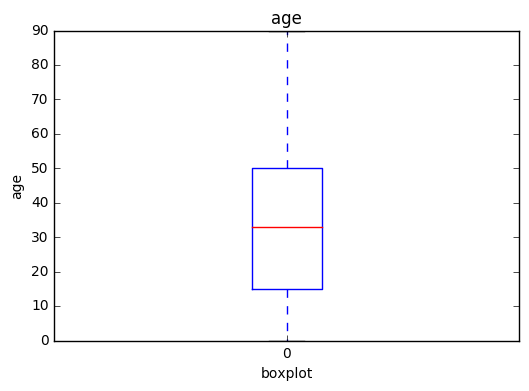

In [10]:
dist = df[0].sort_values()
plot_(0, 'boxplot', header[0], header[0])
dist.plot.box()

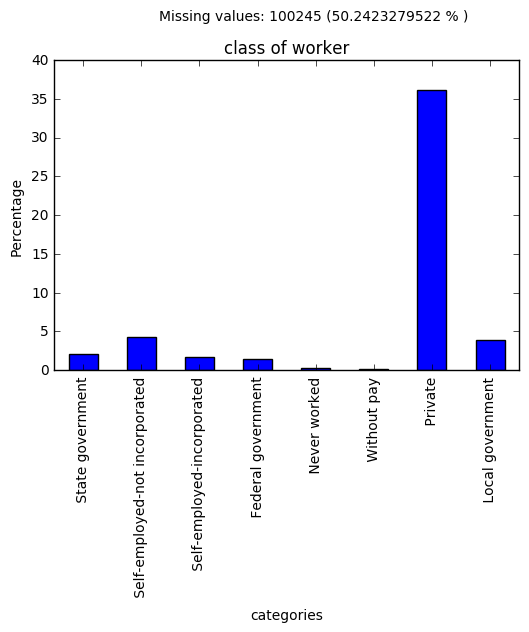

In [11]:
dist = df[1].value_counts(sort=False)
miss = [' Not in universe', ' ?', ' Not in universe or children', ' Not in universe under 1 year old']
m = 0
for k in miss:
    if k in dist.index.tolist():
        m = +dist[k]
        dist = dist.drop(k)
dist = dist * 100. / df.shape[0]
plot_(0, 'categories', 'Percentage', header[1])
dist.plot.bar()
plt.figtext(0.3, 1, 'Missing values: ' + str(m) + ' (' + str(m * 100. / df.shape[0]) + ' % )')

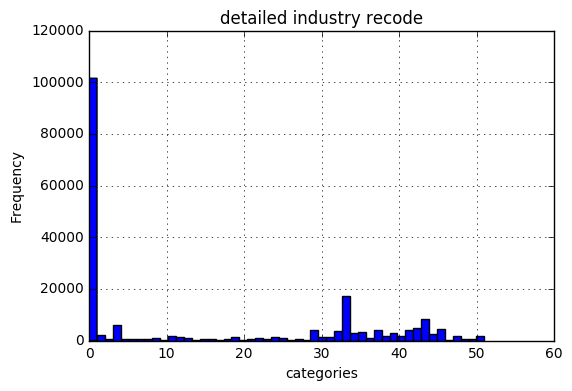

In [12]:
dist = df[2].value_counts(sort=False)
miss = [' Not in universe', ' ?', ' Not in universe or children', ' Not in universe under 1 year old']
m = 0
for k in miss:
    if k in dist.index.tolist():
        m = +dist[k]
        dist = dist.drop(k)
dist = dist * 100. / df.shape[0]
plot_(0, 'categories', 'Frequency', header[2])
df[2].hist(bins=50)

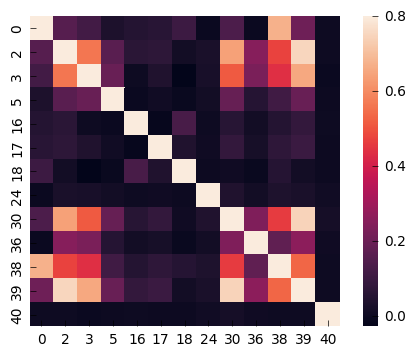

In [19]:
corrmat = df.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, vmax=.8, square=True);